In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [21]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [24]:
len(x_train)

60000

In [25]:
len(x_test)

10000

In [8]:
x_train[0].shape

(28, 28)

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

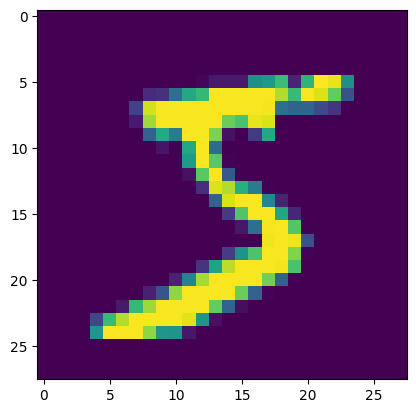

In [10]:
plt.imshow(x_train[0])

In [11]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [12]:
x_train_flatten = x_train.reshape(len(x_train),28*28)/255.0
x_test_flatten = x_test.reshape(len(x_test),28*28)/255.0

In [13]:
x_train_flatten[0]
x_train_flatten.shape

(60000, 784)

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train_flatten, y_train, epochs=10, validation_data=(x_test_flatten,y_test))


C:\Users\kambm\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8104 - loss: 0.7256 - val_accuracy: 0.9161 - val_loss: 0.3065
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9141 - loss: 0.3056 - val_accuracy: 0.9220 - val_loss: 0.2828
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9196 - loss: 0.2879 - val_accuracy: 0.9239 - val_loss: 0.2713
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9234 - loss: 0.2750 - val_accuracy: 0.9239 - val_loss: 0.2703
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9248 - loss: 0.2714 - val_accuracy: 0.9257 - val_loss: 0.2667
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9274 - loss: 0.2602 - val_accuracy: 0.9255 - val_loss: 0.2623
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9288 - loss: 0.2560 - val_accuracy: 0.9273 - val_loss: 0.2668
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9288 - loss: 0.25

In [15]:
y_predict = model.predict(x_test_flatten.round(2))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


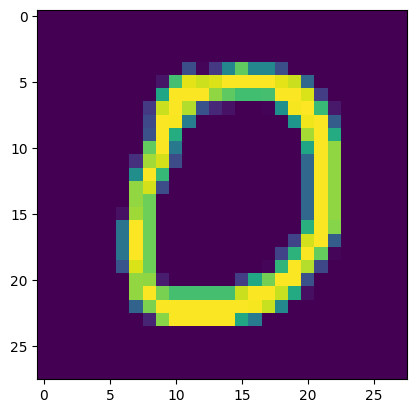

In [16]:
plt.imshow(x_test[10])

In [27]:
y_predicted_label = [np.argmax(i) for i in y_predict]
conf_matrix = tf.math.confusion_matrix(y_test, y_predicted_label)


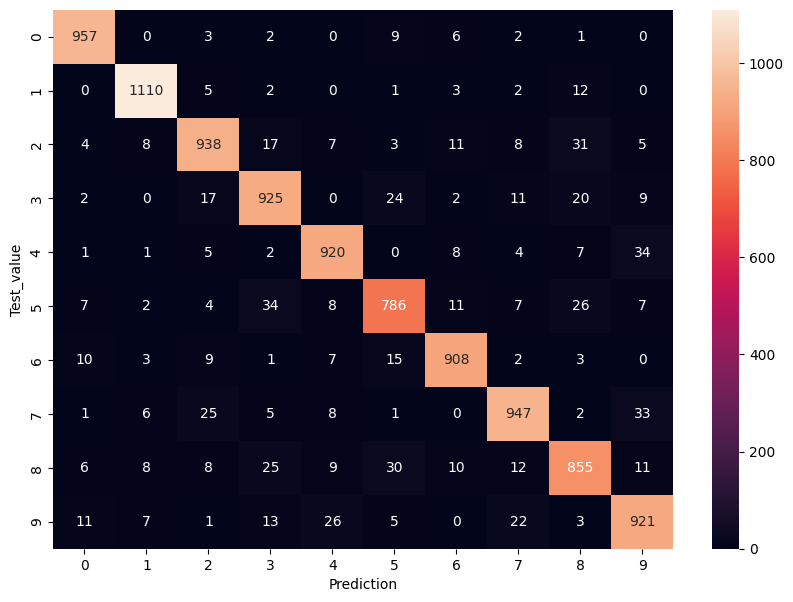

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix,annot=True,fmt='d')
plt.xlabel("Prediction")
plt.ylabel("Test_value")
plt.show()

In [30]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train_flatten, y_train, epochs=10, validation_data=(x_test_flatten,y_test))


C:\Users\kambm\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8699 - loss: 0.4539 - val_accuracy: 0.9561 - val_loss: 0.1489
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9616 - loss: 0.1303 - val_accuracy: 0.9661 - val_loss: 0.1077
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9741 - loss: 0.0859 - val_accuracy: 0.9740 - val_loss: 0.0832
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9807 - loss: 0.0639 - val_accuracy: 0.9754 - val_loss: 0.0787
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9858 - loss: 0.0476 - val_accuracy: 0.9778 - val_loss: 0.0713
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9885 - loss: 0.0385 - val_accuracy: 0.9758 - val_loss: 0.0805
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9903 - loss: 0.0316 - val_accuracy: 0.9758 - val_loss: 0.0796
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9921 - loss: 0

In [44]:
y_predict2 = model.predict(x_test_flatten.round(2))
print(np.argmax(y_predict2))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
12


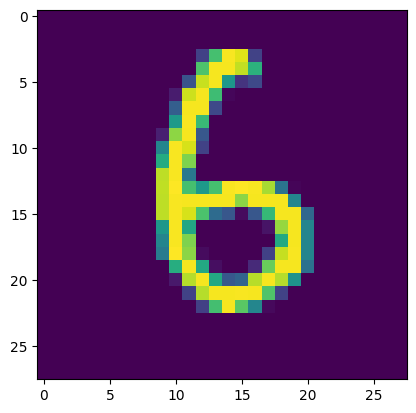

In [42]:
plt.imshow(x_test[21])

In [45]:
y_predicted_label2 = [np.argmax(i) for i in y_predict2]
conf_matrix2 = tf.math.confusion_matrix(y_test, y_predicted_label2)


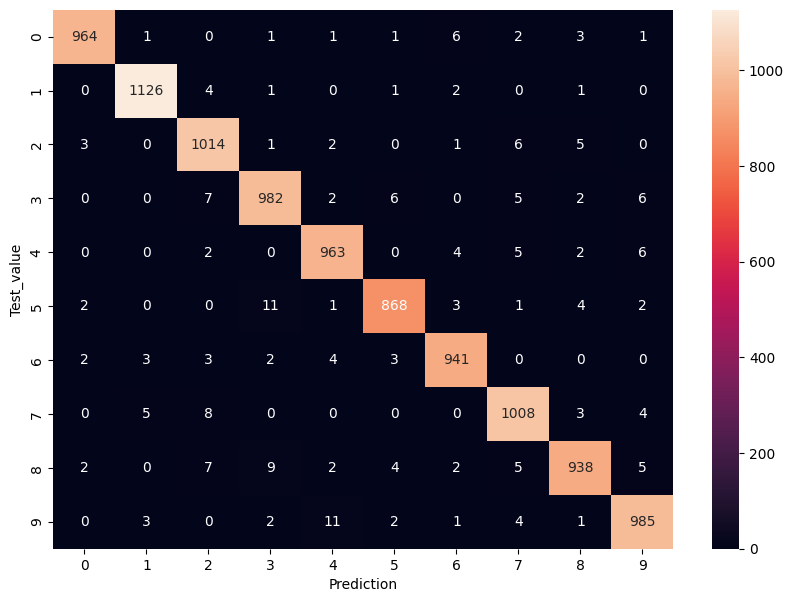

In [47]:
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix2,annot=True,fmt='d')
plt.xlabel("Prediction")
plt.ylabel("Test_value")
plt.show()

In [48]:
#Test Hidden_layered Model

Enter any random index to Test the image: 100


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
The Predicted Value is 6
The Actual image 


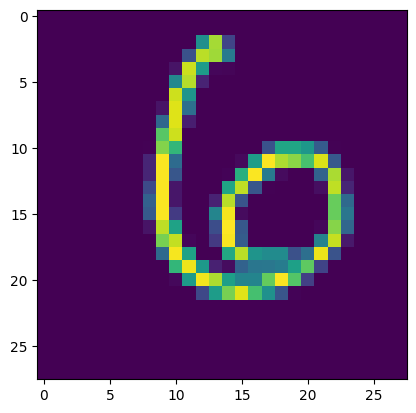

In [53]:
n = int(input("Enter any random index to Test the image:"))
y_prediction = model.predict(x_test_flatten[n].reshape(1,-1).round(2))
y_prediction = np.argmax(y_prediction)
print(f"The Predicted Value is {y_prediction}")
print(f"The Actual image ")
plt.imshow(x_test[n])